# Project: Movies Data Analysis by Ruth Mwaura

#### Table of Contents
- Introduction
- Data wrangling
- EDA
- Conclusion


### Introduction

#### About the Dataset
This data set contains information about movies collected from The Movie Database (TMDb), including user ratings and revenue. Data points include cast, crew, budget, revenue, release dates, vote_count, TMDB vote counts and vote averages. The primary goal of this Dataset is to find varaible insights of the most popular movies and as well depict a picture of movies that made the highest revenue. For this analysis we will visualize top 5 for each popular movie and top 5 of the movies that made the highest revenue.

#### Dataset Description
Features:
- budget: The budget of the movie in dollars.
- genres: A stringified list of dictionaries that list out all the - genres associated with the movie.
- id: The ID of the movie.
- imdb_id: The IMDB ID of the movie.
- original_title: The original title of the movie.
- overview: A brief description of the movie.
- popularity: The Popularity Score assigned by TMDB.
- homepage: The URL of the homepage.
- production_companies: A stringified list of production companies - involved with the making of the movie.
- release_date: Theatrical Release Date of the movie.
- revenue: The total revenue of the movie in dollars.
- runtime: The runtime of the movie in minutes.
- tagline: The tagline of the movie.
- vote_average: The average rating of the movie.
- vote_count: The number of votes by users, as counted TMDB

#### Questions for Analysis?
The following questions are to be answered by carrying out the EDA:
1. Which genres are most popular from year to year?
2. What kinds of properties are associated with movies that have high revenues?
3. Which movies sold the most?
4. Which movies had the highest revenue?

#### Importing packages

In [1]:
#Importing the packages to be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#### Read the data

In [2]:
#Reading the dataset to a dataframe
movies_data = pd.read_csv('tmdb-movies.csv')
movies_data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### Data Wrangling

#### Checking how many rows and columns the dataset has

In [3]:
# Calling the shape on the dataset gives the rows and columns
movies_data.shape

(10866, 21)

#### Dropping some columns that will not be used in the EDA

In [4]:
# Creating a list of all columns that are to be dropped
dropped_cols = ['imdb_id',
                'budget',
                'keywords',
                'cast',
                'homepage',
                'director',
                'tagline',
                'overview',
                'release_date',
                'vote_count',]
movies_data.drop(dropped_cols, inplace=True, axis=1)
movies_data.head()

,id,popularity,revenue,original_title,runtime,genres,production_companies,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,1506249360,Furious 7,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,7.3,2015,1.747999e+08,1.385749e+09


If the retained cells are known in advance, pass them to "usecols" argument of "pd.read_csv"

In [5]:
movies_data['id'].is_unique

False

In [6]:
#movies_data.drop('id', axis='columns', inplace=True)
md = movies_data
md.set_index('id', inplace=True)
md.head()

,popularity,revenue,original_title,runtime,genres,production_companies,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,
135397,32.985763,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6.5,2015,1.379999e+08,1.392446e+09
76341,28.419936,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,7.1,2015,1.379999e+08,3.481613e+08
262500,13.112507,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,6.3,2015,1.012000e+08,2.716190e+08
140607,11.173104,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,7.5,2015,1.839999e+08,1.902723e+09
168259,9.335014,1506249360,Furious 7,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,7.3,2015,1.747999e+08,1.385749e+09


#### Dropping null values

In [7]:
md.dtypes.value_counts()

float64    4
int64      3
object     3
dtype: int64

In [8]:
md.dropna(how = 'all')

,popularity,revenue,original_title,runtime,genres,production_companies,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,
135397,32.985763,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6.5,2015,1.379999e+08,1.392446e+09
76341,28.419936,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,7.1,2015,1.379999e+08,3.481613e+08
262500,13.112507,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,6.3,2015,1.012000e+08,2.716190e+08
140607,11.173104,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,7.5,2015,1.839999e+08,1.902723e+09
168259,9.335014,1506249360,Furious 7,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...
21,0.080598,0,The Endless Summer,95,Documentary,Bruce Brown Films,7.4,1966,0.000000e+00,0.000000e+00
20379,0.065543,0,Grand Prix,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,5.7,1966,0.000000e+00,0.000000e+00
39768,0.065141,0,Beregis Avtomobilya,94,Mystery|Comedy,Mosfilm,6.5,1966,0.000000e+00,0.000000e+00


In [9]:
md.dropna()

,popularity,revenue,original_title,runtime,genres,production_companies,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,
135397,32.985763,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6.5,2015,1.379999e+08,1.392446e+09
76341,28.419936,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,7.1,2015,1.379999e+08,3.481613e+08
262500,13.112507,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,6.3,2015,1.012000e+08,2.716190e+08
140607,11.173104,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,7.5,2015,1.839999e+08,1.902723e+09
168259,9.335014,1506249360,Furious 7,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...
21,0.080598,0,The Endless Summer,95,Documentary,Bruce Brown Films,7.4,1966,0.000000e+00,0.000000e+00
20379,0.065543,0,Grand Prix,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,5.7,1966,0.000000e+00,0.000000e+00
39768,0.065141,0,Beregis Avtomobilya,94,Mystery|Comedy,Mosfilm,6.5,1966,0.000000e+00,0.000000e+00


In [10]:
md.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10866 entries, 135397 to 22293
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10866 non-null  float64
 1   revenue               10866 non-null  int64  
 2   original_title        10866 non-null  object 
 3   runtime               10866 non-null  int64  
 4   genres                10843 non-null  object 
 5   production_companies  9836 non-null   object 
 6   vote_average          10866 non-null  float64
 7   release_year          10866 non-null  int64  
 8   budget_adj            10866 non-null  float64
 9   revenue_adj           10866 non-null  float64
dtypes: float64(4), int64(3), object(3)
memory usage: 933.8+ KB


In [11]:
md.dropna()

,popularity,revenue,original_title,runtime,genres,production_companies,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,
135397,32.985763,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6.5,2015,1.379999e+08,1.392446e+09
76341,28.419936,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,7.1,2015,1.379999e+08,3.481613e+08
262500,13.112507,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,6.3,2015,1.012000e+08,2.716190e+08
140607,11.173104,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,7.5,2015,1.839999e+08,1.902723e+09
168259,9.335014,1506249360,Furious 7,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...
21,0.080598,0,The Endless Summer,95,Documentary,Bruce Brown Films,7.4,1966,0.000000e+00,0.000000e+00
20379,0.065543,0,Grand Prix,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,5.7,1966,0.000000e+00,0.000000e+00
39768,0.065141,0,Beregis Avtomobilya,94,Mystery|Comedy,Mosfilm,6.5,1966,0.000000e+00,0.000000e+00


In [13]:
md.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10866 entries, 135397 to 22293
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10866 non-null  float64
 1   revenue               10866 non-null  int64  
 2   original_title        10866 non-null  object 
 3   runtime               10866 non-null  int64  
 4   genres                10843 non-null  object 
 5   production_companies  9836 non-null   object 
 6   vote_average          10866 non-null  float64
 7   release_year          10866 non-null  int64  
 8   budget_adj            10866 non-null  float64
 9   revenue_adj           10866 non-null  float64
dtypes: float64(4), int64(3), object(3)
memory usage: 933.8+ KB


In [14]:
md.dropna()

,popularity,revenue,original_title,runtime,genres,production_companies,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,
135397,32.985763,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6.5,2015,1.379999e+08,1.392446e+09
76341,28.419936,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,7.1,2015,1.379999e+08,3.481613e+08
262500,13.112507,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,6.3,2015,1.012000e+08,2.716190e+08
140607,11.173104,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,7.5,2015,1.839999e+08,1.902723e+09
168259,9.335014,1506249360,Furious 7,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...
21,0.080598,0,The Endless Summer,95,Documentary,Bruce Brown Films,7.4,1966,0.000000e+00,0.000000e+00
20379,0.065543,0,Grand Prix,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,5.7,1966,0.000000e+00,0.000000e+00
39768,0.065141,0,Beregis Avtomobilya,94,Mystery|Comedy,Mosfilm,6.5,1966,0.000000e+00,0.000000e+00


### Exploratory Data Analysis
> Tip: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must compare and show trends in the varied visualizations.

> Tip: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you should perform both single-variable (1d) and multiple-variable (2d) explorations.

In [15]:
#Group the data for analysis
pop_genres = md['genres'].value_counts().head(20)
pop_genres

Comedy                  712
Drama                   712
Documentary             312
Drama|Romance           289
Comedy|Drama            280
Comedy|Romance          268
Horror|Thriller         259
Horror                  253
Comedy|Drama|Romance    222
Drama|Thriller          138
Comedy|Family           102
Action|Thriller         101
Thriller                 93
Drama|Comedy             92
Animation|Family         90
Crime|Drama|Thriller     81
Crime|Drama              74
Comedy|Horror            72
Drama|Comedy|Romance     64
Action                   63
Name: genres, dtype: int64

Here we wanted to see the top most commonly, watched genres.

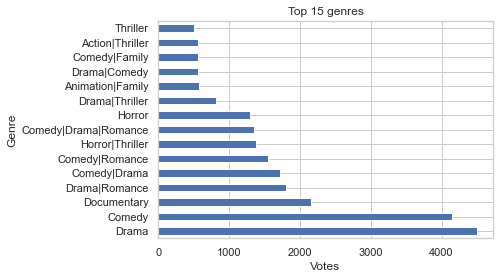

In [21]:
#Plotting the common (top) genres against their total average votes
sns.set_style('whitegrid')
plt.title('Top 15 genres')
md.groupby('genres')['vote_average'].sum().sort_values(ascending=False).head(15).plot(kind='barh')
plt.xlabel('Votes')
plt.ylabel('Genre')
plt.show()

#### Movies with the highest returns

Text(0.5, 1.0, 'Top 10 Revenue making Movies')

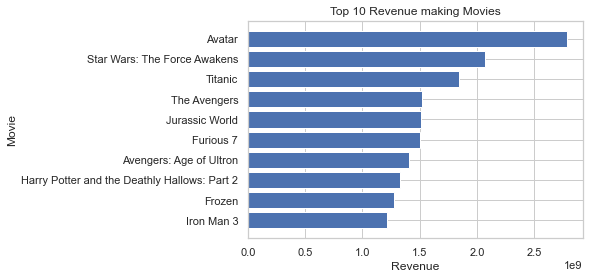

In [17]:
#Plotting the top movies against revenue 
pop= md.sort_values('revenue', ascending=False)
plt.barh(pop['original_title'].head(10),pop['revenue'].head(10), align='center')
plt.gca().invert_yaxis()
plt.xlabel("Revenue")
plt.ylabel("Movie")
plt.title("Top 10 Revenue making Movies")

#### Production companies with the highest revenues over time

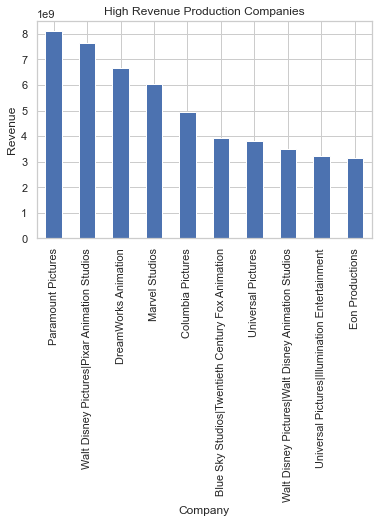

In [18]:
sns.set_style('whitegrid')
md.groupby('production_companies')['revenue'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.ylabel("Revenue")
plt.xlabel("Company")
plt.title("High Revenue Production Companies")
plt.show()

### Conclusions
The following are the findings from the EDA:
The 5 most popular genres are:
1. Drama
2. Comedy
3. Documentaries
4. Drama|Romance
5. Comedy|Drama

The following properties are associated with movies that make high revenues:
1. Production companies
2. Original title 

The top 5 movies that sold the most and hence made the highest revenues are the following:
1. Avatar
2. Star Wars: The Force Awakens
3. Titanic
4. The Avengers
5. Jurassic World

#### Limitations
1. The dataset contains unrealistic values (0) in the budget column hence, it was not possible to see how the budget of the movie influenced its returns

2. Another issue is inflation when dealing with metrics such as revenue, Gross sales and profits. Where you find that the dataset has not been adjusted for inflation. Therefore, the statistics of this metrics will tend to strongly favor movie franchises in the recent times.